# Individual Project
Erick Olivas

ISM4402

Analysis Exercise 2

In [1]:
#import libraries needed for code
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn.preprocessing as pre
import numpy as np

#import the data
df = pd.read_csv('datasets/axisdata.csv')

## 1. Average cars sold per month

In [2]:
print('Average cars sold: ' + str(df['Cars Sold'].mean()))

Average cars sold: 3.9229229229229228


## 2. Max Cars Sold per Month


In [3]:
print('Max cars sold: ' + str(df['Cars Sold'].max()))

Max cars sold: 7


## 3. Min Cars Sold per Month

In [4]:
print('Min cars sold: ' + str(df['Cars Sold'].min()))

Min cars sold: 1


## 4. Average cars sold per month by gender

In [5]:
#make new dataframe to make sorting and printing easier
gcs = df.groupby(['Gender']).mean()['Cars Sold']
gcs = gcs.reset_index()
print('Average cars sold by gender:')
print(gcs.to_string(index = False,header = False))

Average cars sold by gender:
 F  3.760736
 M  4.078431


## 5. Average Hours worked by people selling more than three cars per month

In [6]:
df[df['Cars Sold']>3]['Hours Worked'].mean()

34.740237691001695

In [7]:
print(str(df[df['Cars Sold'] > 3]['Hours Worked'].mean()))

34.740237691001695


## 6. Average years experience

In [8]:
print(str(df['Years Experience'].mean()))

3.026026026026026


## 7. Average years of experience for people selling more than three cars per month

In [9]:
print(str(df[df['Cars Sold'] > 3]['Years Experience'].mean()))

3.0492359932088284


## 8. Average cars sold per month sorted by wether they have had sales training

In [10]:
#make new dataframe to make sorting and printing easier
stcs = df.groupby(['SalesTraining']).mean()['Cars Sold']
stcs = stcs.reset_index()

print(str(stcs.to_string(index= False,header = False)))

 N  3.573850
 Y  4.168942


## Best indicators of good salesmen/saleswomen

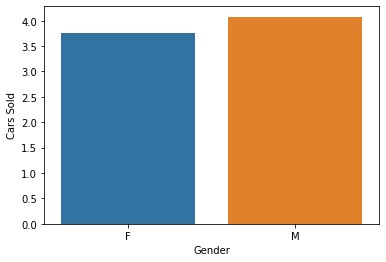

In [11]:
plt.figure()
sns.barplot(x = gcs['Gender'],y = gcs['Cars Sold'],data = gcs)

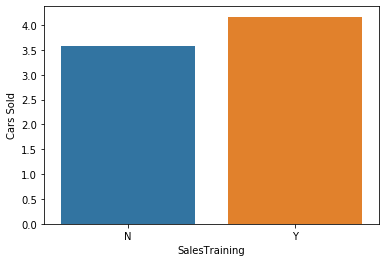

In [12]:
plt.figure()
sns.barplot(x = stcs['SalesTraining'], y = stcs['Cars Sold'],data = stcs)

In [13]:
pd.pivot_table(df, 'Cars Sold', index=['Years Experience'], columns = ['SalesTraining'], aggfunc=np.mean)

SalesTraining,N,Y
Years Experience,,
1,3.705128,3.752381
2,3.506173,4.055556
3,3.590361,4.286822
4,3.731707,4.230088
5,3.359551,4.486726


In [14]:
pd.pivot_table(df, 'Cars Sold', index=['Years Experience'], columns = ['SalesTraining'], aggfunc=np.sum)

SalesTraining,N,Y
Years Experience,,
1,289,394
2,284,511
3,298,553
4,306,478
5,299,507


In [15]:
pd.pivot_table(df, 'Hours Worked', index=['Years Experience'], columns = ['SalesTraining'], aggfunc=np.mean)

SalesTraining,N,Y
Years Experience,,
1,33.179487,32.914286
2,32.925926,33.984127
3,33.819277,35.023256
4,33.963415,32.991150
5,33.460674,34.380531


In [16]:
pd.pivot_table(df, 'Hours Worked', index=['Years Experience'], columns = ['SalesTraining'], aggfunc=np.sum)

SalesTraining,N,Y
Years Experience,,
1,2588,3456
2,2667,4282
3,2807,4518
4,2785,3728
5,2978,3885


### Readjusting dataframe to show average hours worked per car sold by Sales Training

In [17]:
for ind, row in df.iterrows():
    df.loc[ind,"Hours Worked per Car Sold"]= row ["Hours Worked"]/row["Cars Sold"]
pd.pivot_table(df, 'Hours Worked per Car Sold', index=['Years Experience'], columns = ['SalesTraining'], aggfunc=np.mean)

SalesTraining,N,Y
Years Experience,,
1,11.166239,10.309524
2,11.490329,9.871277
3,11.565462,9.126744
4,11.180691,8.877602
5,12.370599,8.372061
